In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,roc_curve
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Titanic_train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df.shape

(891, 12)

In [6]:
df.size

10692

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df['Age'].fillna(df['Age'].median(),inplace=True)

In [10]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [11]:
df.drop('Cabin',axis=1,inplace=True)

In [12]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [15]:
df1=pd.get_dummies(df,columns=['Sex','Embarked'],dtype=int)

In [16]:
df1.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,0,0,1


array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>,
        <Axes: title={'center': 'Sex_female'}>,
        <Axes: title={'center': 'Sex_male'}>],
       [<Axes: title={'center': 'Embarked_C'}>,
        <Axes: title={'center': 'Embarked_Q'}>,
        <Axes: title={'center': 'Embarked_S'}>]], dtype=object)

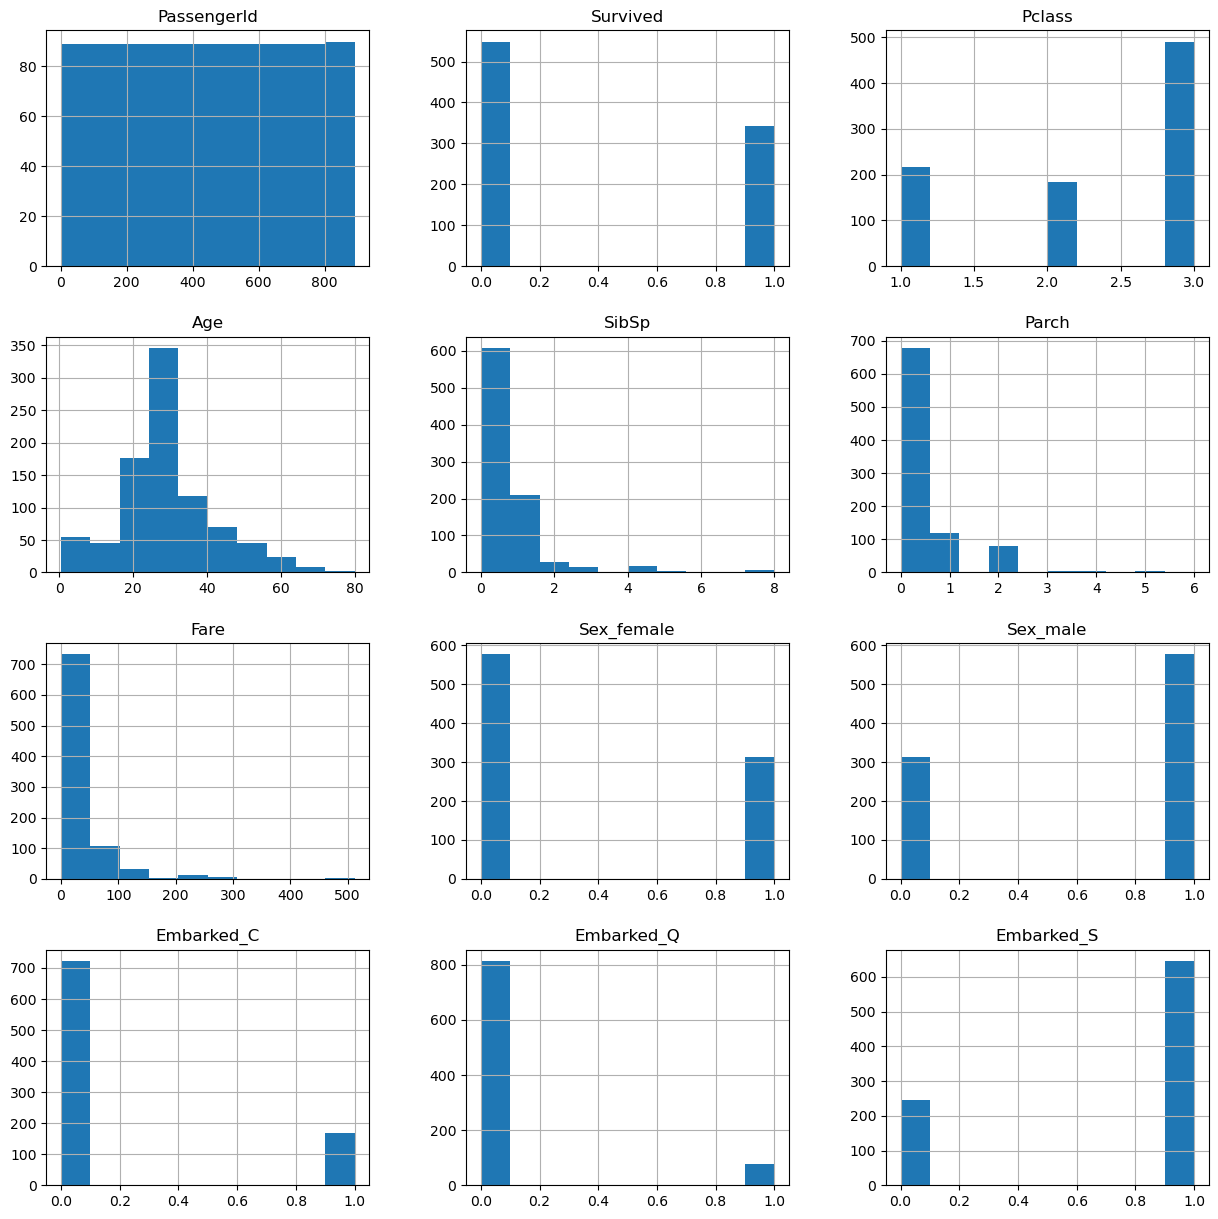

In [17]:
df1.hist(figsize=(15,15))

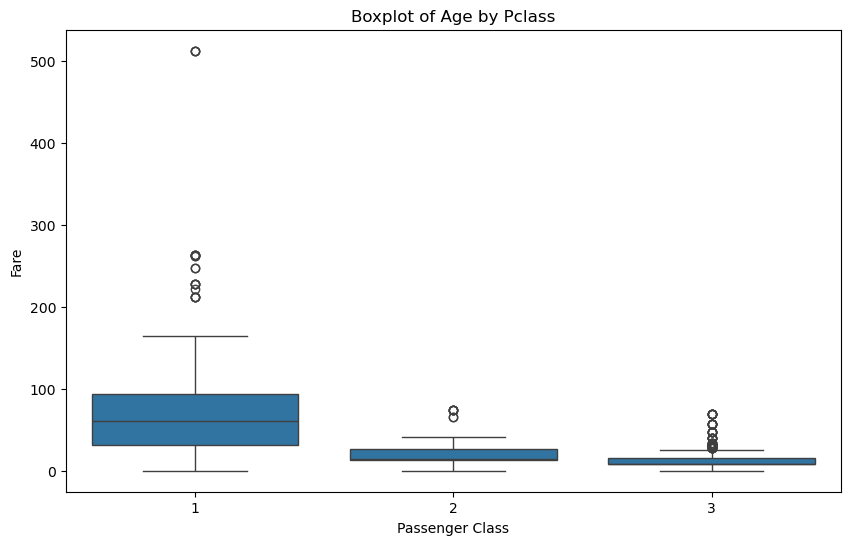

In [18]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=df1)
plt.title('Boxplot of Age by Pclass')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()

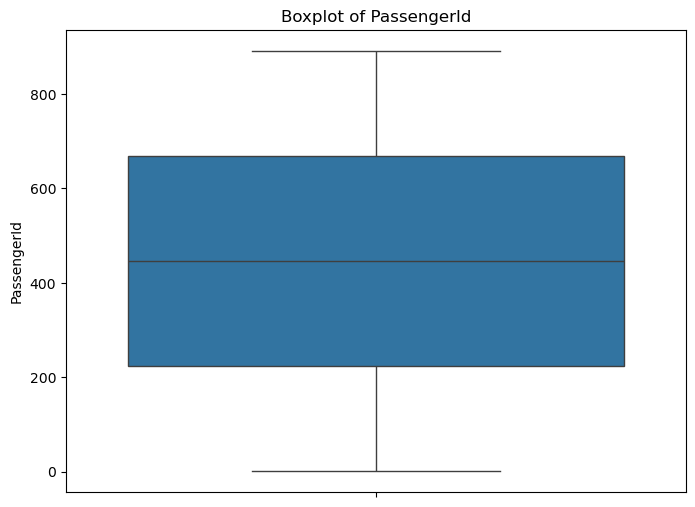

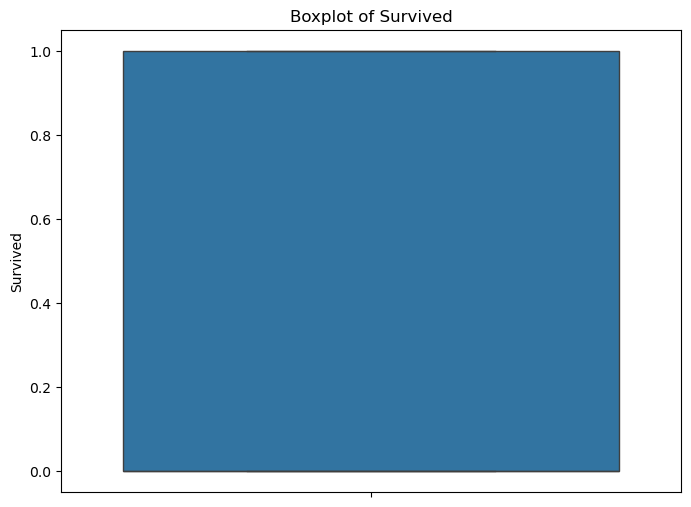

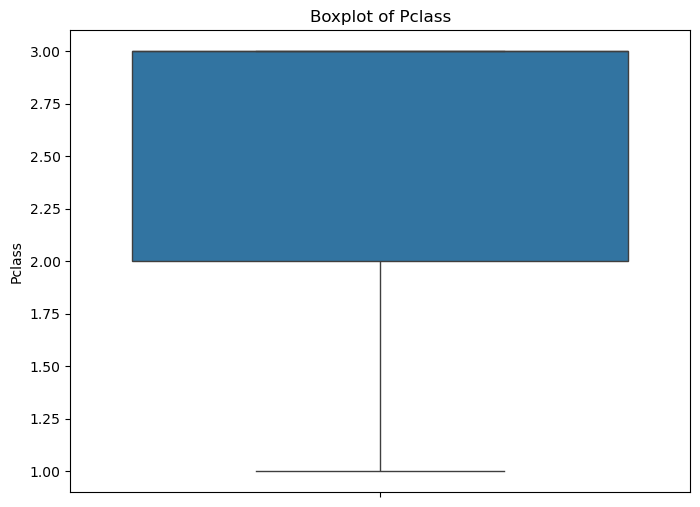

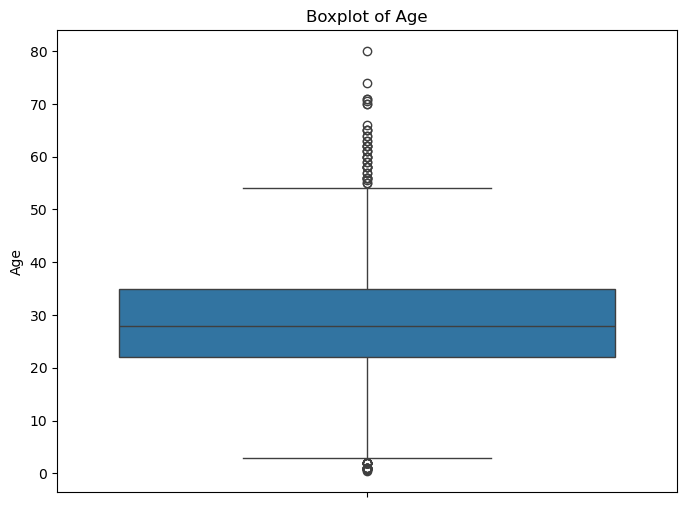

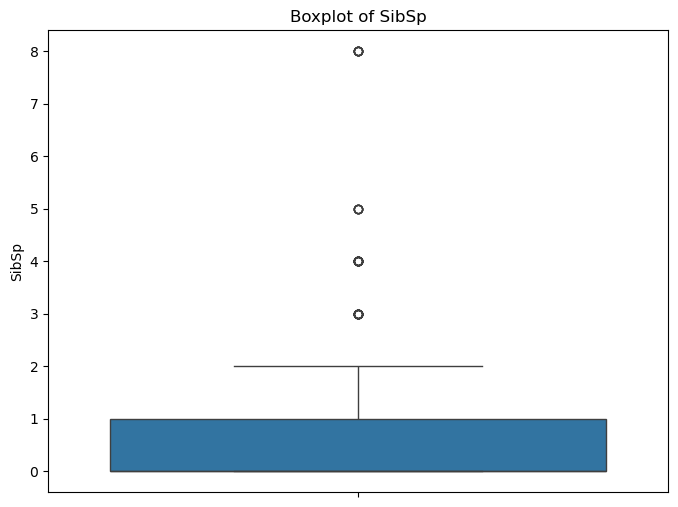

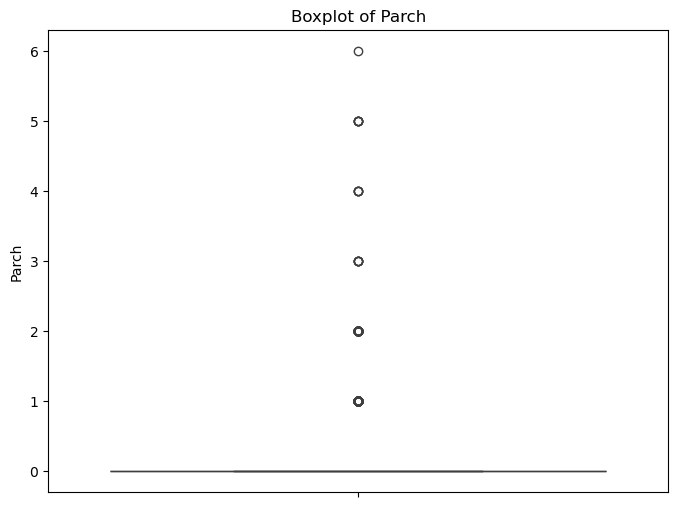

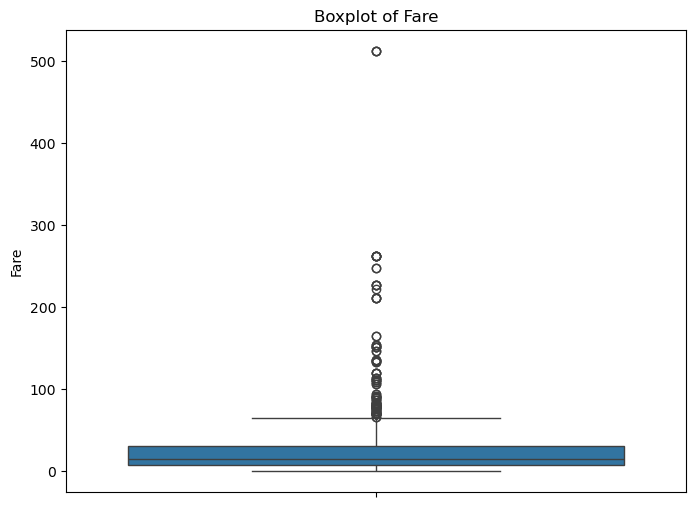

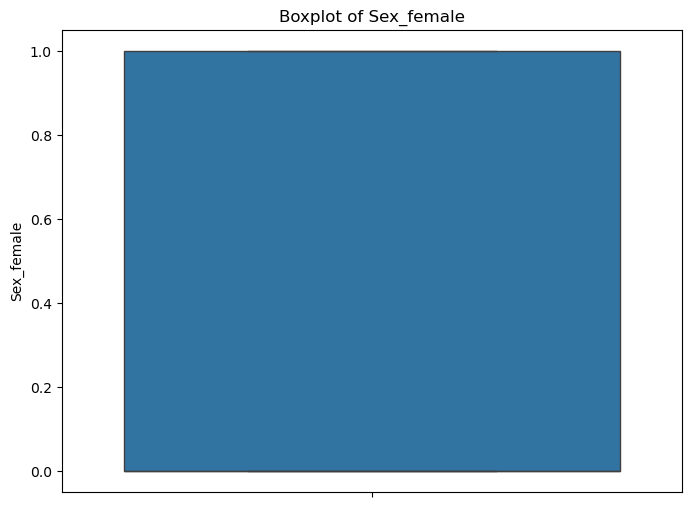

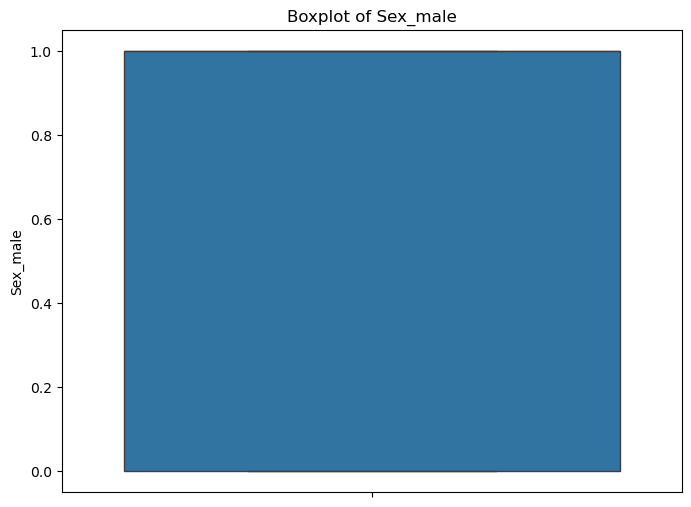

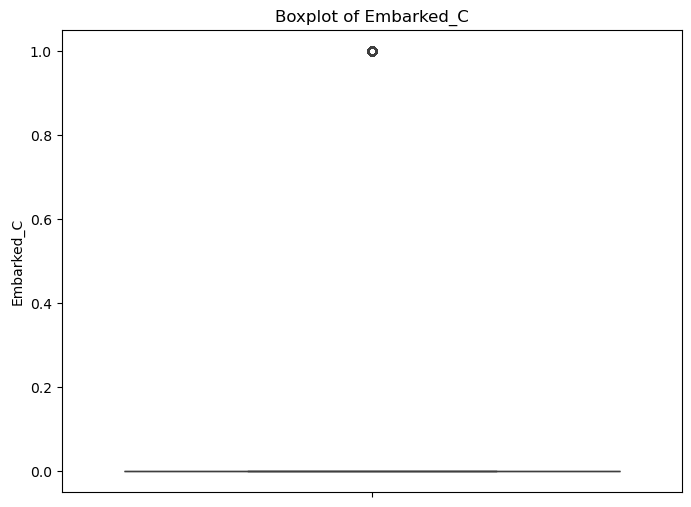

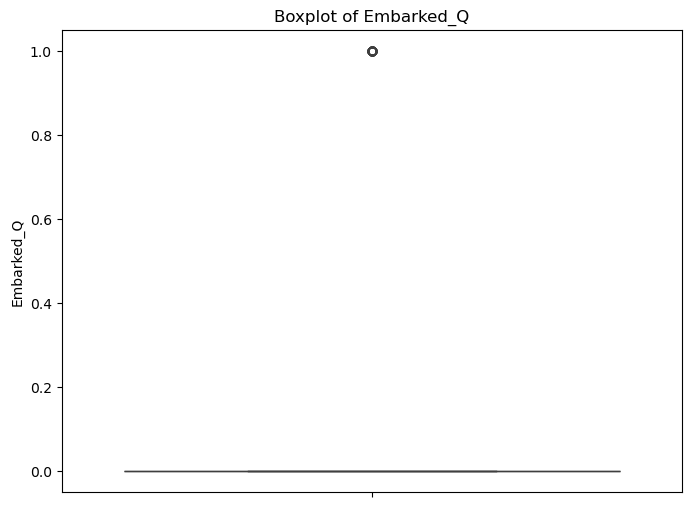

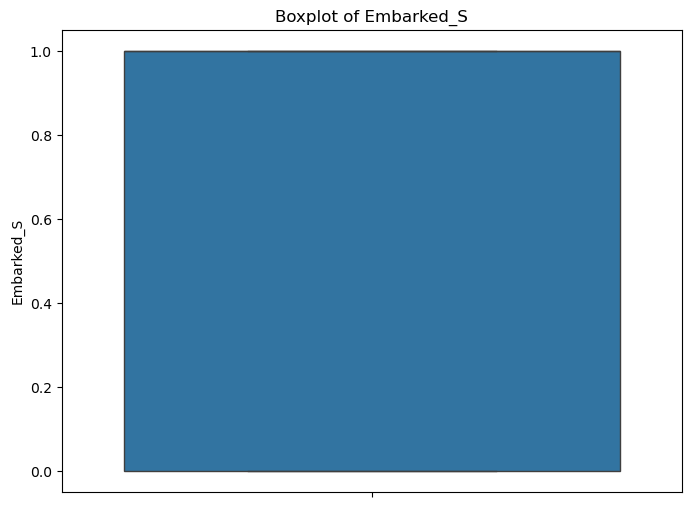

In [19]:
for column in df1.select_dtypes(include=np.number):
  plt.figure(figsize=(8, 6))
  sns.boxplot(y=df1[column])
  plt.title(f'Boxplot of {column}')
  plt.show()

In [20]:
df1.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

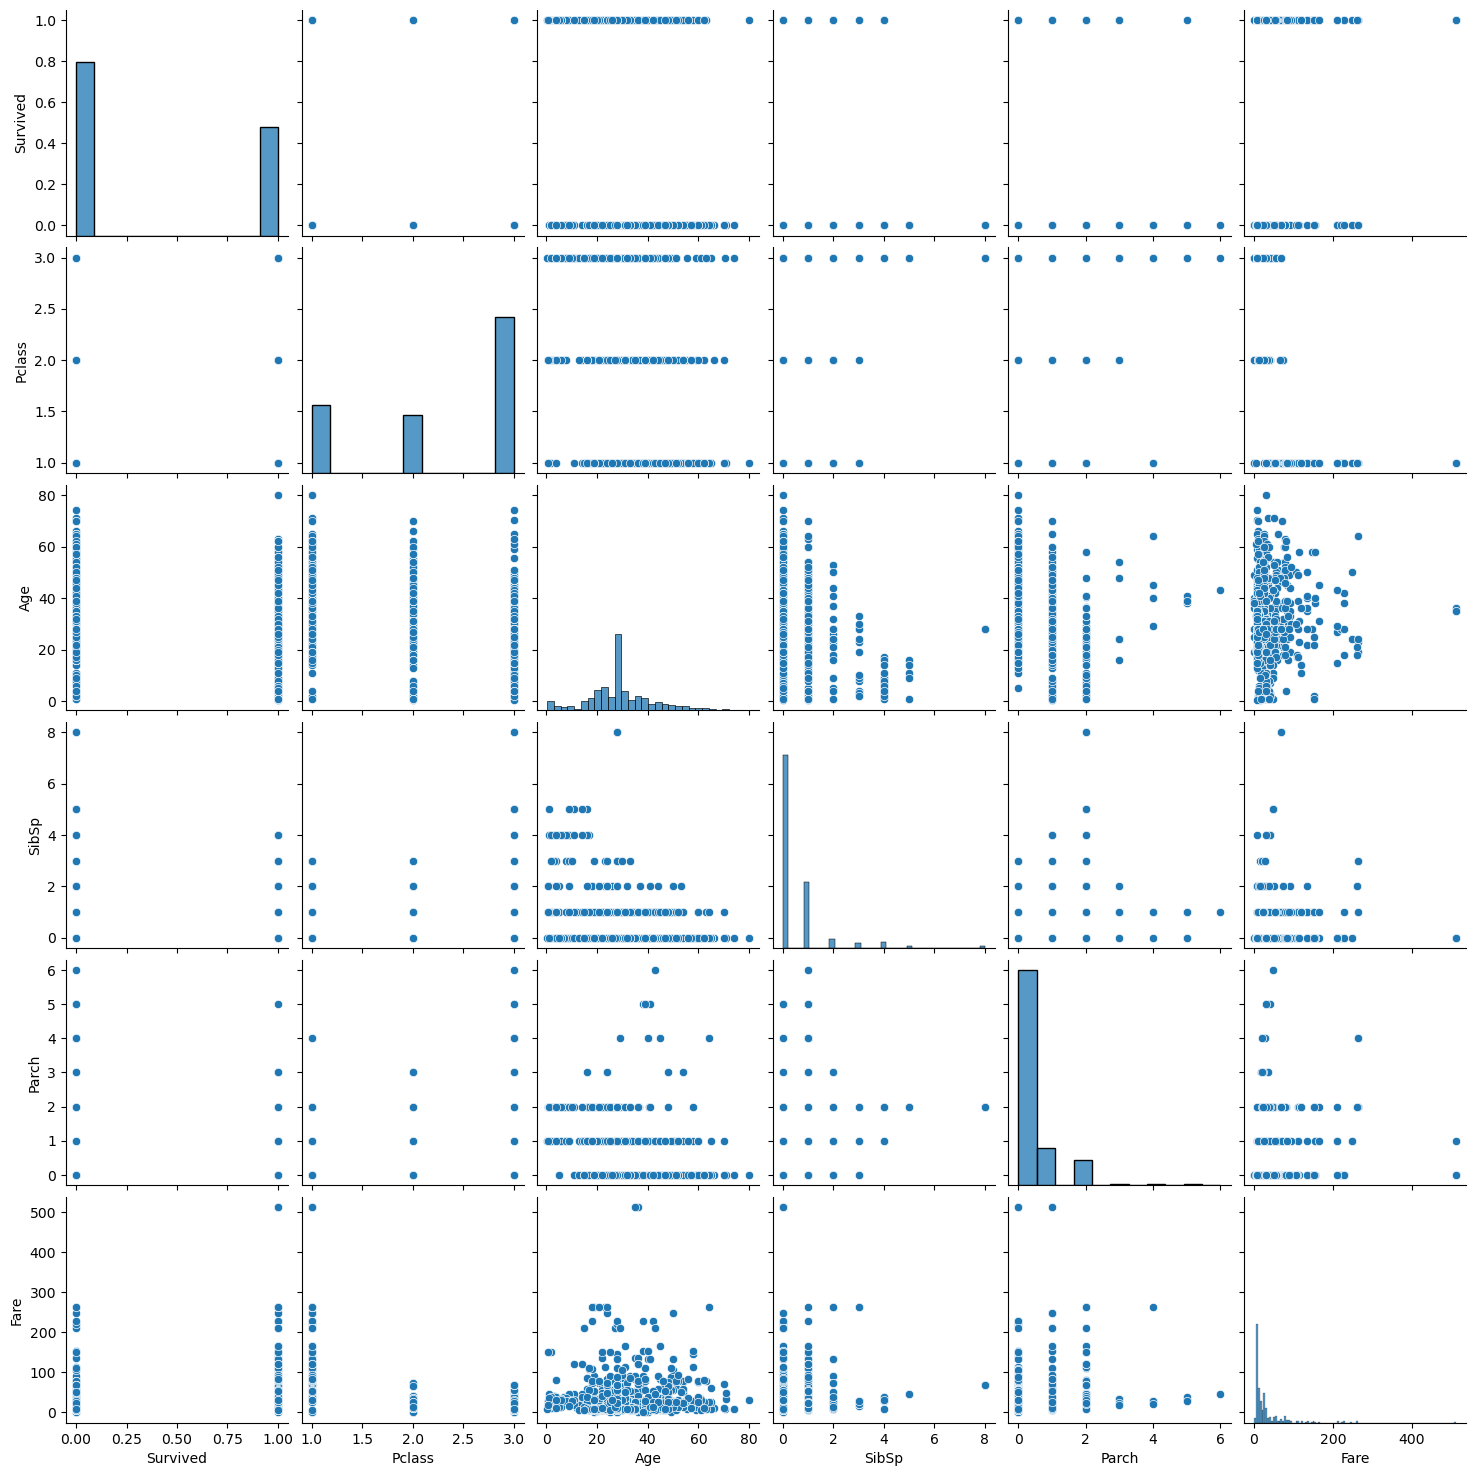

In [21]:
# prompt: pairplots

sns.pairplot(df1[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']])
plt.show()

In [22]:
df1[['Pclass','Survived']].corr()

,Pclass,Survived
Pclass,1.000000,-0.338481
Survived,-0.338481,1.000000


In [23]:
df1[['Fare','Survived']].corr()

,Fare,Survived
Fare,1.000000,0.257307
Survived,0.257307,1.000000


In [24]:
df1[['Age','Survived']].corr()

,Age,Survived
Age,1.00000,-0.06491
Survived,-0.06491,1.00000


In [25]:
df1[['Sex_female', 'Survived']].groupby('Sex_female').mean()

,Survived
Sex_female,
0,0.188908
1,0.742038


In [26]:

df1[['Sex_male', 'Survived']].groupby('Sex_male').mean()

,Survived
Sex_male,
0,0.742038
1,0.188908


In [27]:
num_col=df1.select_dtypes(include=np.number).columns
num_col

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [28]:
cat_col=df1.select_dtypes(exclude=np.number).columns
cat_col

Index(['Name', 'Ticket'], dtype='object')

In [29]:
df2=pd.read_csv('Titanic_test.csv')

In [30]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [32]:
df2.shape

(418, 11)

In [33]:
df2.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [34]:
df2['Age'].fillna(df2['Age'].median(),inplace=True)

In [35]:
df2['Fare'].fillna(df2['Fare'].median(),inplace=True)

In [36]:
df2.drop('Cabin',axis=1,inplace=True)

In [37]:
df2.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [38]:
df2.duplicated().sum()

0

In [39]:
df2.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [40]:
df4=pd.get_dummies(df2,columns=['Sex','Embarked'],dtype=int)

In [41]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         418 non-null    float64
 8   Sex_female   418 non-null    int32  
 9   Sex_male     418 non-null    int32  
 10  Embarked_C   418 non-null    int32  
 11  Embarked_Q   418 non-null    int32  
 12  Embarked_S   418 non-null    int32  
dtypes: float64(2), int32(5), int64(4), object(2)
memory usage: 34.4+ KB


In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Sex_female   891 non-null    int32  
 10  Sex_male     891 non-null    int32  
 11  Embarked_C   891 non-null    int32  
 12  Embarked_Q   891 non-null    int32  
 13  Embarked_S   891 non-null    int32  
dtypes: float64(2), int32(5), int64(5), object(2)
memory usage: 80.2+ KB


In [43]:
train_data=df1.drop(['PassengerId','Name','Ticket'],axis=1)

In [44]:
test_data=df4.drop(['PassengerId','Name','Ticket'],axis=1)

In [45]:
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [46]:
x_train=train_data.drop('Survived',axis=1)
y_train=train_data['Survived']
x_test=test_data

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.2,random_state=42)

In [48]:
log_model=LogisticRegression(max_iter=200, random_state=42)

In [49]:
log_model.fit(x_train,y_train)

LogisticRegression(max_iter=200, random_state=42)

In [50]:
y_test_pred=log_model.predict(x_test)

In [51]:
y_test_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [52]:
y_test_pred_proba=log_model.predict_proba(x_test)[:,1]

In [53]:
accuracy=accuracy_score(y_test,y_test_pred)
precision=precision_score(y_test,y_test_pred)
recall=recall_score(y_test,y_test_pred)
f1=f1_score(y_test,y_test_pred)
roc_auc=roc_auc_score(y_test,y_test_pred_proba)

In [54]:
print('Accuracy:',accuracy)
print('Precision:',precision)
print('Recall:',recall)
print('F1 Score:',f1)
print('ROC AUC Score:',roc_auc)

Accuracy: 0.8100558659217877
Precision: 0.7857142857142857
Recall: 0.7432432432432432
F1 Score: 0.7638888888888888
ROC AUC Score: 0.8823680823680823


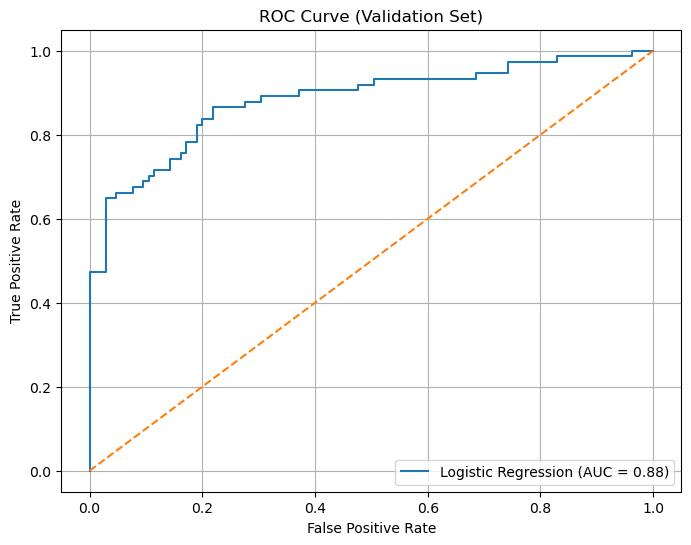

In [55]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Validation Set)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [56]:
log_model.coef_

array([[-0.95781256, -0.03101314, -0.29896204, -0.1164588 ,  0.00255686,
         2.00193121, -0.64215979,  0.63019043,  0.51153474,  0.21804625]])

Okay, here's how to interpret the coefficients and feature significance of your logistic regression model:

a. Interpreting Coefficients

Coefficients: After fitting the Logistic Regression model (using log_model.fit), you can access the coefficients using log_model.coef_. These coefficients represent the change in the log-odds of survival for a one-unit change in the corresponding predictor variable, holding all other variables constant.
Positive Coefficients: A positive coefficient for a feature indicates that an increase in that feature's value is associated with an increase in the probability of survival.
Negative Coefficients: A negative coefficient suggests that an increase in that feature's value is associated with a decrease in the probability of survival.
Magnitude: The magnitude of the coefficient reflects the strength of the association. Larger coefficients indicate stronger relationships.
Example: If the coefficient for 'Sex_female' is positive and large, it suggests that being female is strongly associated with a higher probability of survival.
b. Feature Significance

P-values: You can get p-values associated with each coefficient to assess their statistical significance. Features with low p-values (typically less than 0.05) are considered statistically significant, implying that their relationship with survival is unlikely due to random chance. You can use the statsmodels library or other statistical tools in Python to obtain the p-values if they are not directly accessible.
Odds Ratios: You can use the coefficients to calculate odds ratios by exponentiating them: np.exp(log_model.coef_). Odds ratios provide a more intuitive interpretation of the relationship between a feature and the odds of survival.
Example: An odds ratio greater than 1 for a feature indicates that an increase in that feature's value is associated with higher odds of survival. An odds ratio less than 1 suggests the opposite.
Feature Importance: You can also use techniques like feature importance scores (available in some machine learning libraries) to rank the features based on their contribution to the model's predictive power.
Remember, this interpretation is based on the specific data you used to train the model and may not generalize to other datasets or populations. You need to thoroughly evaluate the model's performance and consider other factors when interpreting the results.

In [58]:
import pickle

In [59]:
file='titanic_model.pkl'

In [60]:
with open(file,'wb') as f:
  pickle.dump(log_model,f)